In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)


In [3]:
print("Dataset Preview:")
print(df.head())


Dataset Preview:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [4]:
df = df[['median_income', 'total_rooms', 'housing_median_age', 'median_house_value']]

In [5]:
df = df.dropna()

In [6]:
X = df[['median_income', 'total_rooms', 'housing_median_age']]
y = df['median_house_value']


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [10]:
joblib.dump(model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [11]:
print("\nModel and Scaler Saved Successfully!")


Model and Scaler Saved Successfully!


In [12]:
y_pred = model.predict(X_test_scaled)

In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [14]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")


Model Performance:
Mean Absolute Error (MAE): 60348.04
Mean Squared Error (MSE): 6563178660.01
Root Mean Squared Error (RMSE): 81013.45
R-squared Score (R²): 0.4992


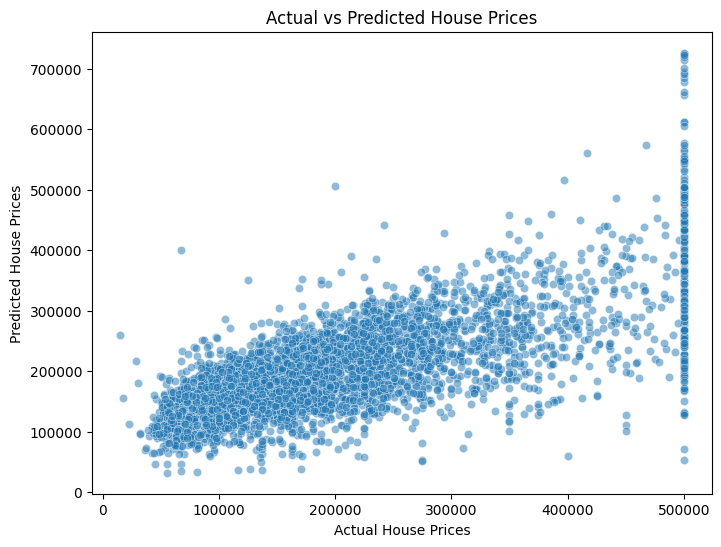

In [15]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [24]:
# Ensure new input has correct column names
new_house = pd.DataFrame([[5.0, 1500, 20]], columns=['median_income', 'total_rooms', 'housing_median_age'])

# Scale using the trained scaler
new_house_scaled = scaler.transform(new_house)

# Predict price
predicted_price = model.predict(new_house_scaled)


In [18]:
print(f"\nPredicted House Price for New Data: ${predicted_price[0]:,.2f}")


Predicted House Price for New Data: $233,528.57


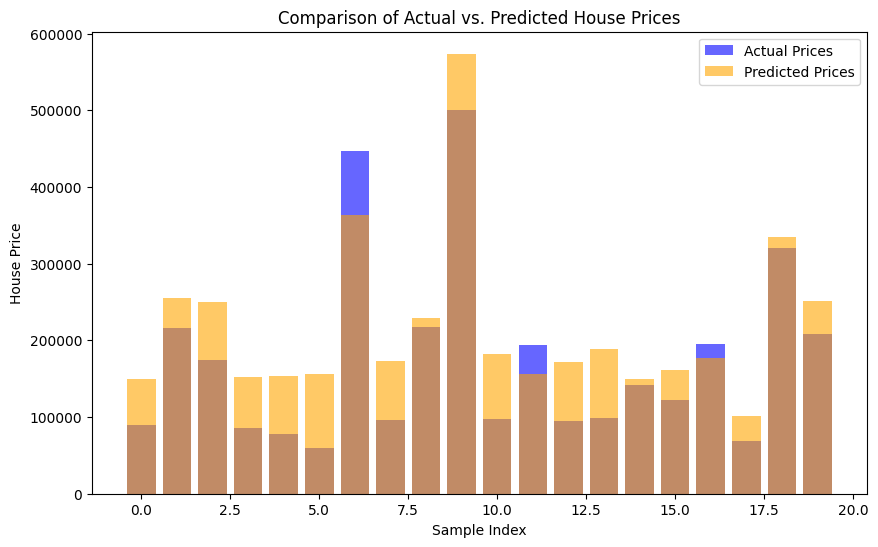

In [20]:
#actual vs predicted
import numpy as np

# Select a few sample predictions
sample_indices = np.random.choice(len(y_test), size=20, replace=False)  # Pick 20 random points
y_test_sample = y_test.iloc[sample_indices]
y_pred_sample = y_pred[sample_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(y_test_sample)), y_test_sample, alpha=0.6, label="Actual Prices", color="blue")
plt.bar(range(len(y_pred_sample)), y_pred_sample, alpha=0.6, label="Predicted Prices", color="orange")
plt.xlabel("Sample Index")
plt.ylabel("House Price")
plt.title("Comparison of Actual vs. Predicted House Prices")
plt.legend()
plt.show()


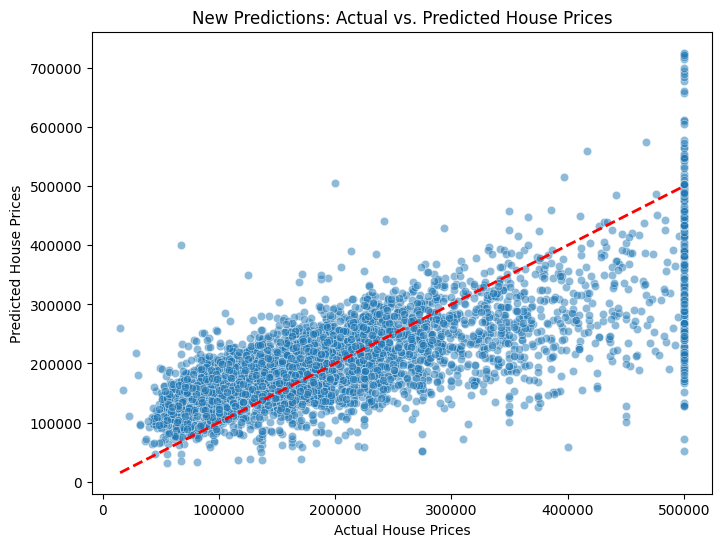

In [22]:
#new predictions vs actual prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # Reference line
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("New Predictions: Actual vs. Predicted House Prices")
plt.show()


In [29]:

import pandas as pd
import joblib
import numpy as np

In [30]:
model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")


In [31]:
new_house = np.array([[5.0, 1500, 20]])  # (median_income, total_rooms, housing_median_age)


In [32]:
feature_names = ['median_income', 'total_rooms', 'housing_median_age']
new_house_df = pd.DataFrame(new_house, columns=feature_names)


In [33]:
# Predict price
predicted_price = model.predict(new_house_scaled)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")

Predicted House Price: $233,528.57


C:\Users\PRADEEPTHI\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


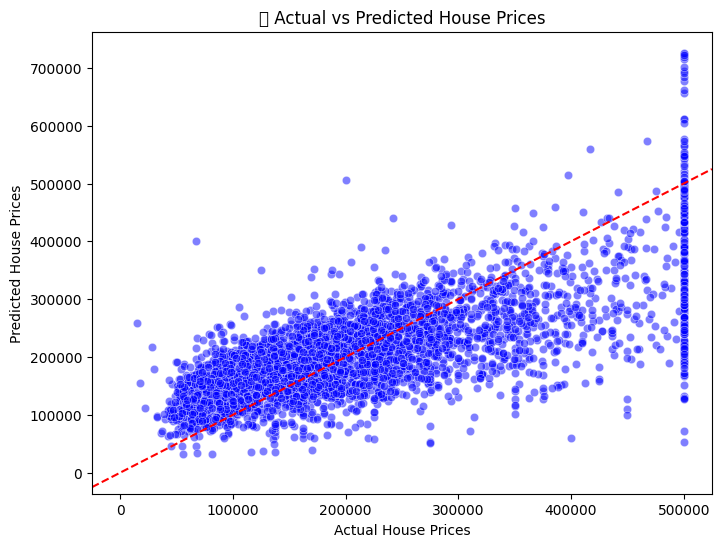


📊 Model Performance Metrics:
🔹 Mean Absolute Error (MAE): 60348.04
🔹 Mean Squared Error (MSE): 6563178660.01
🔹 Root Mean Squared Error (RMSE): 81013.45
🔹 R-squared Score (R²): 0.4992


In [34]:
# Compare the actual vs predicted values
y_pred = model.predict(X_test_scaled)

# Visualization: Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("📈 Actual vs Predicted House Prices")
plt.axline((0, 0), slope=1, color="red", linestyle="--")  # Reference line
plt.show()

# Print Model Performance
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 Model Performance Metrics:")
print(f"🔹 Mean Absolute Error (MAE): {mae:.2f}")
print(f"🔹 Mean Squared Error (MSE): {mse:.2f}")
print(f"🔹 Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"🔹 R-squared Score (R²): {r2:.4f}")


In [35]:
# Load model & scaler
import joblib
import numpy as np

model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")

# ✅ Ensure the input matches trained features (3 features)
new_house = np.array([[5.0, 1500, 20]])  # (median_income, total_rooms, housing_median_age)

# Scale the input using the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict price
predicted_price = model.predict(new_house_scaled)
print(f"Predicted House Price: ${predicted_price[0]:,.2f}")


Predicted House Price: $233,528.57


C:\Users\PRADEEPTHI\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
#for better predictions we are predicting on 4 features instead of 3 
# Import necessary libraries
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
df = pd.read_csv(url)

In [41]:

# Select 4 relevant features for prediction
df = df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'median_income', 'median_house_value']]


In [42]:
df = df.dropna()

In [44]:
# Split dataset into Features (X) and Target (y)
X = df[['total_bedrooms', 'housing_median_age', 'total_rooms', 'median_income']]  # 4 features
y = df['median_house_value']  # Target

# Split Data into Training & Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [45]:
# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save model & scaler
joblib.dump(model, "house_price_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

In [46]:
y_pred = model.predict(X_test_scaled)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


Model Performance:
Mean Absolute Error (MAE): 58160.23
Mean Squared Error (MSE): 6182630108.07
Root Mean Squared Error (RMSE): 78629.70
R-squared Score (R²): 0.5479


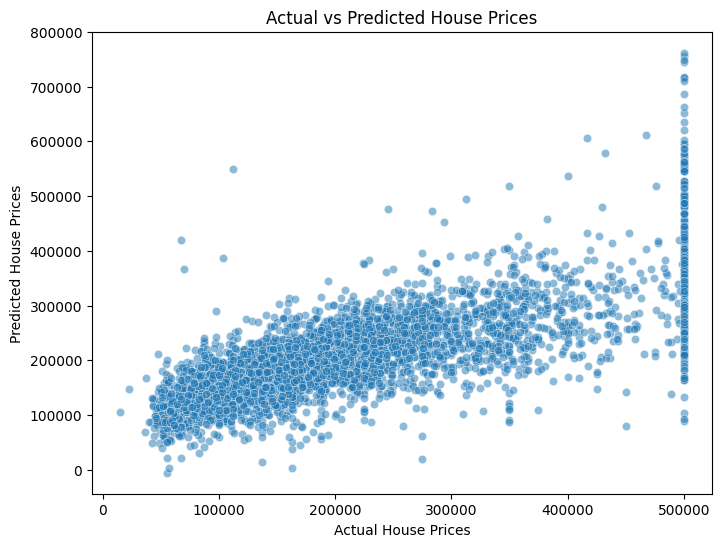

In [47]:
print("\nModel Performance:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared Score (R²): {r2:.4f}")

# Scatterplot of Actual vs Predicted Prices
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual House Prices")
plt.ylabel("Predicted House Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()


In [48]:
# Load model & scaler
model = joblib.load("house_price_model.pkl")
scaler = joblib.load("scaler.pkl")

# Ensure input matches trained features
feature_names = ['total_bedrooms', 'housing_median_age', 'total_rooms', 'median_income']
new_house = pd.DataFrame([[3, 20, 1500, 5.0]], columns=feature_names)  # Convert to DataFrame

# Scale the input using the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict price
predicted_price = model.predict(new_house_scaled)
print(f"\nPredicted House Price: ${predicted_price[0]:,.2f}")



Predicted House Price: $190,229.79


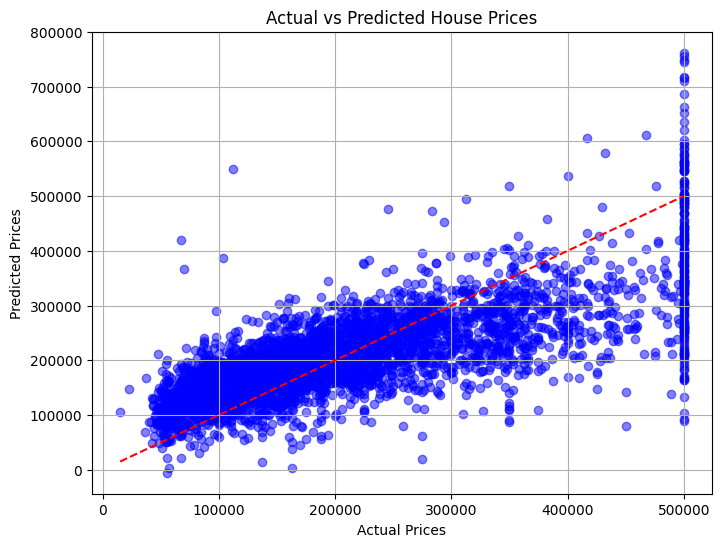

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))

# Scatter plot of actual vs. predicted prices
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)

# Perfect prediction line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')

# Labels and title
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)

plt.show()
